In [27]:
import pandas as pd

# Example data: Replace this with actual values from your models
# Assuming you've calculated metrics for each model and stored them in dictionaries or lists

# Metrics for Model 1
user_based = {
    'Precision@K': 0.20468856947296374,
    'Recall@K': 0.5000855578370978,
    'MAP': 0.60098826975022,
    'NDCG@K': 0.6129363449691991,
    'HitRate@K': 0.6129363449691991,
    'Coverage@K': 0.9694656488549618,
    'MRR@K': 0.4678473648186174
}

# Metrics for Model 2
BPR = {
    'Precision@K': 0.17741939425468445,
    'Recall@K': 0.020119000446041778,
    'MAP': 0.8583524151899898,
    'NDCG@K': 0.862412855616766,
    'HitRate@K': 0.8870967741935484,
    'Coverage@K': 0.8207547169811321,
    'MRR@K': 0.8539426523297492
}

# Metrics for Model 3
cosine_similarity = {
    'Precision@K': 0.8,
    'Recall@K': 1.0,
    'MAP': 0.76,
    'NDCG@K': 1.0,
    'HitRate@K': 0.8,
    'Coverage@K': 1.0,
    'MRR@K': 1.0
}

# Weights for each metric (based on priority)
metric_weights = {
    'Precision@K': 3,
    'Recall@K': 3,
    'MAP': 2,
    'NDCG@K': 2,
    'HitRate@K': 1,
    'Coverage@K': 1,
    'MRR@K': 2
}

# Create a DataFrame to compare the models
metrics_df = pd.DataFrame({
    'Metric': ['Precision@K', 'Recall@K', 'MAP', 'NDCG@K', 'HitRate@K', 'Coverage@K', 'MRR@K'],
    'Model 1': list(user_based.values()),
    'Model 2': list(BPR.values()),
    'Model 3': list(cosine_similarity.values())
})

# Set the Metric column as index
metrics_df.set_index('Metric', inplace=True)

# Calculate the weighted score for each model
weighted_scores = {}
for model in ['Model 1', 'Model 2', 'Model 3']:
    weighted_score = sum(metrics_df[model] * metrics_df.index.map(metric_weights)) / sum(metric_weights.values())
    weighted_scores[model] = weighted_score

# Add the weighted scores to the DataFrame for reference
metrics_df['Weighted Score (Model 1)'] = metrics_df['Model 1'] * metrics_df.index.map(metric_weights)
metrics_df['Weighted Score (Model 2)'] = metrics_df['Model 2'] * metrics_df.index.map(metric_weights)
metrics_df['Weighted Score (Model 3)'] = metrics_df['Model 3'] * metrics_df.index.map(metric_weights)

# Sort models based on their weighted scores
sorted_models = sorted(weighted_scores.items(), key=lambda x: x[1], reverse=True)

# Output the comparison table and the rankings
print("Comparison of Models Based on Metrics (with Weights):")
print(metrics_df)

print("\nModel Ranking Based on Weighted Average Score:")
for rank, (model, score) in enumerate(sorted_models, start=1):
    print(f"Rank {rank}: {model} with a Weighted Score of {score:.4f}")



Comparison of Models Based on Metrics (with Weights):
              Model 1   Model 2  Model 3  Weighted Score (Model 1)  \
Metric                                                               
Precision@K  0.204689  0.177419     0.80                  0.614066   
Recall@K     0.500086  0.020119     1.00                  1.500257   
MAP          0.600988  0.858352     0.76                  1.201977   
NDCG@K       0.612936  0.862413     1.00                  1.225873   
HitRate@K    0.612936  0.887097     0.80                  0.612936   
Coverage@K   0.969466  0.820755     1.00                  0.969466   
MRR@K        0.467847  0.853943     1.00                  0.935695   

             Weighted Score (Model 2)  Weighted Score (Model 3)  
Metric                                                           
Precision@K                  0.532258                      2.40  
Recall@K                     0.060357                      3.00  
MAP                          1.716705              

<Figure size 1200x800 with 0 Axes>

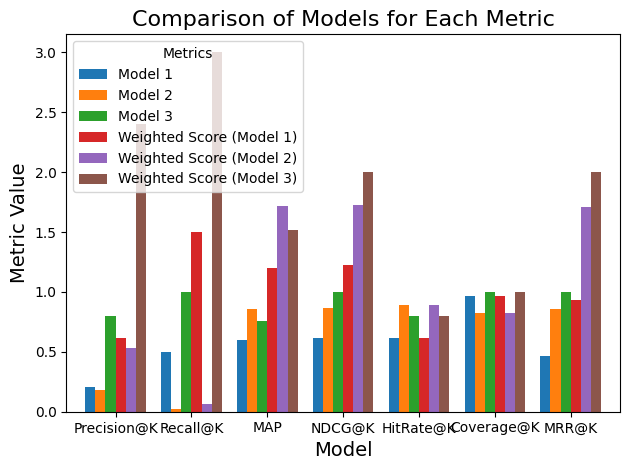

In [28]:
# 1. Bar Plot for Each Metric (Metric-wise comparison for models)
plt.figure(figsize=(12, 8))
metrics_df.plot(kind='bar', width=0.8)
plt.title("Comparison of Models for Each Metric", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Metric Value", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Metrics", loc="upper left")
plt.tight_layout()
plt.show()

<ipython-input-29-ad520fffe364>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weighted_scores_df.index, y=weighted_scores_df['Weighted Score'], palette='viridis')


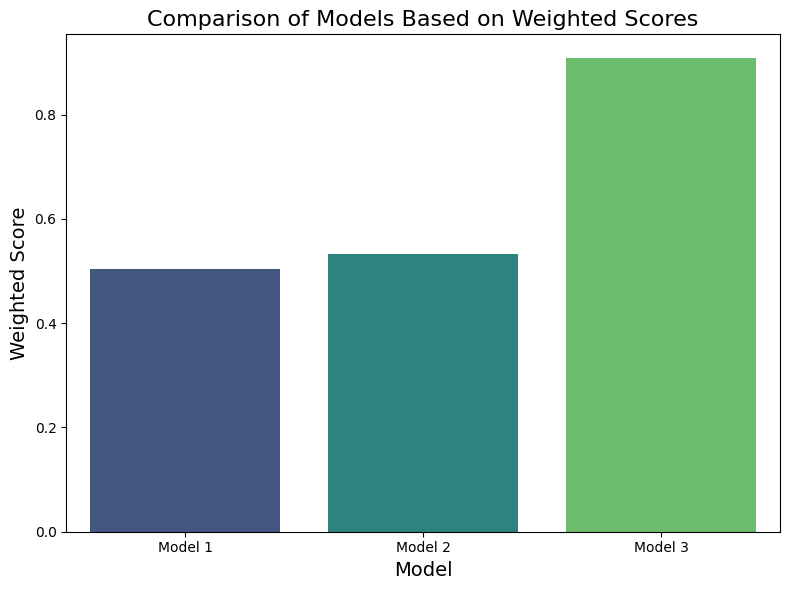

In [29]:
# 2. Bar Plot for Weighted Scores Comparison
plt.figure(figsize=(8, 6))
weighted_scores_df = pd.DataFrame.from_dict(weighted_scores, orient='index', columns=['Weighted Score'])
sns.barplot(x=weighted_scores_df.index, y=weighted_scores_df['Weighted Score'], palette='viridis')
plt.title("Comparison of Models Based on Weighted Scores", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Weighted Score", fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-30-ce5006c1263f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[model[0] for model in ranked_models_ndcg], y=[model[1] for model in ranked_models_ndcg], palette='magma')


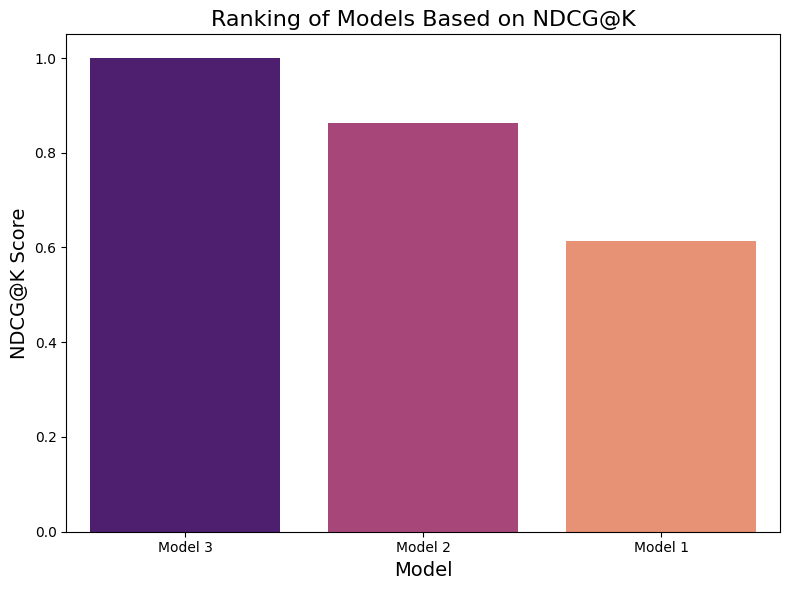

In [30]:
# 5. Ranking Bar Chart Based on NDCG@K
ndcg_scores = {
    'Model 1': user_based['NDCG@K'],
    'Model 2': BPR['NDCG@K'],
    'Model 3': cosine_similarity['NDCG@K']
}

# Sorting the models based on NDCG@K
ranked_models_ndcg = sorted(ndcg_scores.items(), key=lambda x: x[1], reverse=True)

# Plot the ranking based on NDCG@K
plt.figure(figsize=(8, 6))
sns.barplot(x=[model[0] for model in ranked_models_ndcg], y=[model[1] for model in ranked_models_ndcg], palette='magma')
plt.title("Ranking of Models Based on NDCG@K", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("NDCG@K Score", fontsize=14)
plt.tight_layout()
plt.show()

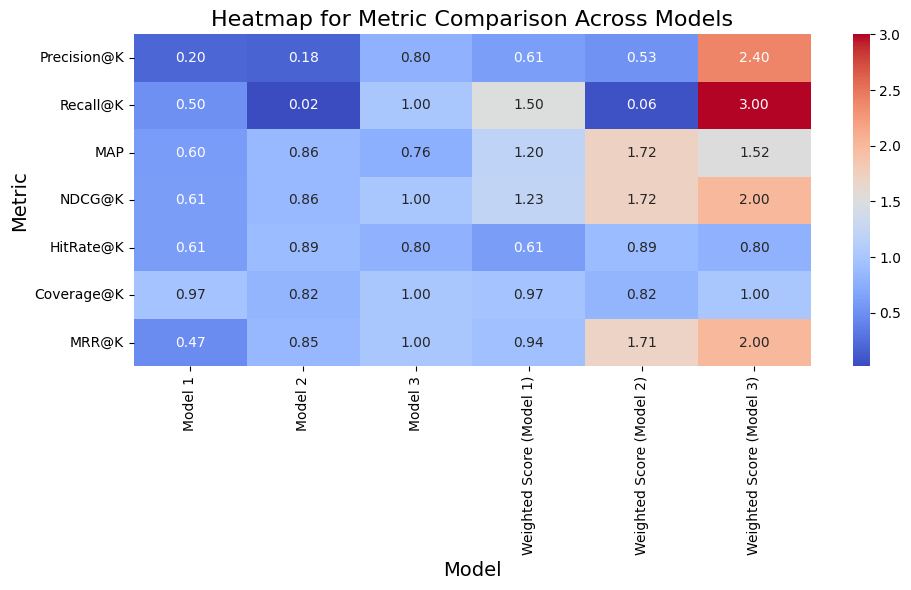

In [31]:
# 6. Heatmap for Metric Comparison (Visualizing Metric Differences Across Models)
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Heatmap for Metric Comparison Across Models", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Metric", fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

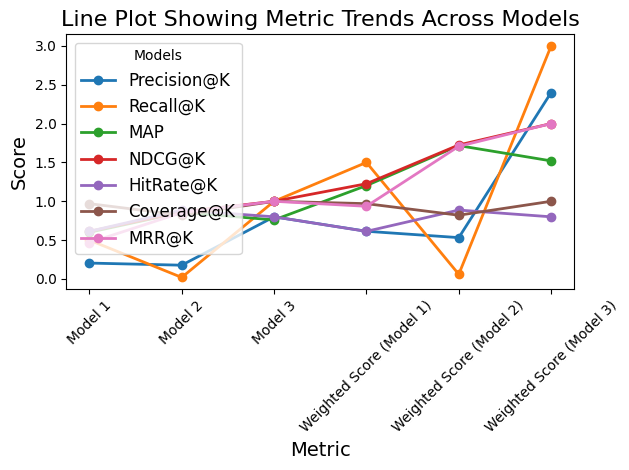

In [32]:
# 7. Line Plot for Metric Trends (Trends in Performance Across Metrics)
plt.figure(figsize=(12, 8))
metrics_df.T.plot(kind='line', marker='o', linewidth=2)
plt.title("Line Plot Showing Metric Trends Across Models", fontsize=16)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Models", fontsize=12)
plt.tight_layout()
plt.show()